In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import datetime
from pandas.api.types import CategoricalDtype 
import seaborn as sns

In [6]:
may_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202405.csv')

In [ ]:
june_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202406.csv')
july_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202407.csv')
aug_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202408.csv')
sept_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202409.csv')
oct_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202410.csv')
nov_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202411.csv')
dec_2024 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202412.csv')
jan_2025 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202501.csv')
feb_2025 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202502.csv')
mar_2025 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202503.csv')
apr_2025 = pd.read_csv('C:\\Users\\dell\\Documents\\Samaya Resumes\\Bike ride data\\202504.csv')

In [8]:
may_2024.head(3)

ride_id rideable_type           started_at             ended_at  \
0  7D9F0CE9EC2A1297  classic_bike  2024-05-25 15:52:42  2024-05-25 16:11:50   
1  02EC47687411416F  classic_bike  2024-05-14 15:11:51  2024-05-14 15:22:00   
2  101370FB2D3402BE  classic_bike  2024-05-30 17:46:04  2024-05-30 18:09:16   

            start_station_name start_station_id          end_station_name  \
0      Streeter Dr & Grand Ave            13022         Clark St & Elm St   
1  Sheridan Rd & Greenleaf Ave     KA1504000159  Sheridan Rd & Loyola Ave   
2      Streeter Dr & Grand Ave            13022       Wabash Ave & 9th St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  
0   TA1307000039  41.892278 -87.612043  41.902973 -87.631280        casual  
1         RP-009  42.010587 -87.662412  42.001044 -87.661198        casual  
2   TA1309000010  41.892278 -87.612043  41.870769 -87.625734        member

In [9]:
tripdata = pd.concat([may_2024,june_2024,july_2024,aug_2024,sept_2024,oct_2024,nov_2024,dec_2024,jan_2025,feb_2025,mar_2025,apr_2025])

In [10]:
tripdata.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [11]:
###How many unique rides are there in total
tripdata.ride_id.nunique()

5735673

In [12]:
###How many types of bikes are there
tripdata.rideable_type.nunique()

3

In [13]:
###how many rows are there in the dataframe
tripdata.shape

(5735884, 13)

In [14]:
###Checking for empty cells
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [15]:
### we do have null values in our dataset, ets see how many of them.
tripdata.isnull().values.sum()

4420134

In [16]:
###dropping unnecessary columns
to_drop = ['start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng']
tripdata.drop(to_drop,inplace=True,axis=1)

In [17]:
tripdata.head()

ride_id  rideable_type           started_at             ended_at  \
0  7D9F0CE9EC2A1297   classic_bike  2024-05-25 15:52:42  2024-05-25 16:11:50   
1  02EC47687411416F   classic_bike  2024-05-14 15:11:51  2024-05-14 15:22:00   
2  101370FB2D3402BE   classic_bike  2024-05-30 17:46:04  2024-05-30 18:09:16   
3  E97E396331ED6913  electric_bike  2024-05-17 20:21:54  2024-05-17 20:40:32   
4  674EDE311C543165   classic_bike  2024-05-22 18:52:20  2024-05-22 18:59:04   

  member_casual  
0        casual  
1        casual  
2        member  
3        member  
4        casual

In [18]:
### Looking for duplicate values
tripdata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
371336    False
371337    False
371338    False
371339    False
371340    False
Length: 5735884, dtype: bool

In [19]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'],format='mixed')
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'],format='mixed')

In [20]:
## Creating an hour column
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour' : 'int8'})

In [21]:
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()

In [22]:
tripdata['month'] = tripdata['started_at'].dt.month_name()

In [23]:
### Creating a ride length cloumn
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')

In [24]:
### Lets check for any rows with zeros or negative values in the ride_length cloumn and remove them
tripdata[tripdata['ride_length']<=0].count()

ride_id          126460
rideable_type    126460
started_at       126460
ended_at         126460
member_casual    126460
hour             126460
dayofweek        126460
month            126460
ride_length      126460
dtype: int64

In [25]:
###Removing rows withh zero or negative values
tripdata = tripdata.drop(tripdata[tripdata.ride_length <=0].index)

In [26]:
tripdata.head()


ride_id  rideable_type          started_at            ended_at  \
2   101370FB2D3402BE   classic_bike 2024-05-30 17:46:04 2024-05-30 18:09:16   
3   E97E396331ED6913  electric_bike 2024-05-17 20:21:54 2024-05-17 20:40:32   
6   162E08B659EF039B   classic_bike 2024-05-17 08:39:54 2024-05-17 08:49:35   
7   473CC6544D5876F2   classic_bike 2024-05-19 17:21:18 2024-05-19 17:51:29   
13  A08FB7FA82FCD72E   classic_bike 2024-05-09 17:38:03 2024-05-09 17:41:37   

   member_casual  hour dayofweek month  ride_length  
2         member    17  Thursday   May           23  
3         member    20    Friday   May           18  
6         casual     8    Friday   May            9  
7         casual    17    Sunday   May           30  
13        member    17  Thursday   May            3

In [27]:
### Rides by customer type
df = tripdata.groupby('member_casual', as_index = True)[['ride_id']].count()
df

ride_id
member_casual         
casual         1777884
member         3077778

In [28]:
### Average ride Length
arl = tripdata.groupby('member_casual',as_index = True)[['ride_length']].mean()
arl

ride_length
member_casual             
casual           24.892933
member           12.175502

In [29]:
### Most popular rideable Type
rt_pivot = pd.pivot_table(tripdata, index=['rideable_type','member_casual'], values ='ride_id',aggfunc=['count'],margins=True,margins_name='total count')
rt_pivot

count
                                ride_id
rideable_type    member_casual         
classic_bike     casual          801382
                 member         1382758
electric_bike    casual          903838
                 member         1645724
electric_scooter casual           72664
                 member           49296
total count                     4855662

In [30]:
### Most popular Day of the week for bike rentals
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek','member_casual'],values='ride_id',aggfunc=['count'],margins=True,margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          273883
            member          451309
Monday      casual          205757
            member          437484
Saturday    casual          364515
            member          398848
Sunday      casual          298498
            member          342149
Thursday    casual          221779
            member          474944
Tuesday     casual          188726
            member          467591
Wednesday   casual          224726
            member          505453
total count                4855662

In [31]:
### Most popular month for bike rentals
pm_pivot = pd.pivot_table(tripdata,index=['month','member_casual'],values='ride_id',aggfunc=['count'],margins=True,margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual           89167
            member          218625
August      casual          269192
            member          375651
December    casual           31049
            member          113743
February    casual           22047
            member          100332
January     casual           19458
            member           91246
July        casual          269981
            member          369539
June        casual          254824
            member          353067
March       casual           69926
            member          175872
May         casual          197812
            member          326339
November    casual           75801
            member          198911
October     casual          183224
            member          346973
September   casual          295403
            member          407480
total count                4855662

In [32]:
### Average Ride Length by day of the week
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek','member_casual'],values='ride_length',aggfunc=['mean'],margins=True,margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          24.578919
                       member          12.036248
Monday                 casual          23.645562
                       member          11.490493
Saturday               casual          28.117523
                       member          13.552842
Sunday                 casual          29.133086
                       member          13.716685
Thursday               casual          21.837257
                       member          11.750072
Tuesday                casual          20.890020
                       member          11.510754
Wednesday              casual          21.932473
                       member          11.777340
total ride_length mean                 16.831945

In [33]:
###Average Ride Length by Month -Let's also check the average ride length – in minutes – by month.
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          21.940101
                       member          11.007341
August                 casual          26.135792
                       member          13.120561
December               casual          17.687784
                       member          10.455272
February               casual          14.170363
                       member           9.649085
January                casual          14.604173
                       member           9.783300
July                   casual          28.394183
                       member          13.420427
June                   casual          28.346015
                       member          13.658646
March                  casual          21.119684
                       member          10.998112
May                    casual          28.108436
                       member          13.285835
November               casual          19.347489
                       member          10.707130
October                casual          23.720184
                       member          11.646802
September              casual          21.598616
                       member          11.940758
total ride_length mean                 16.831945

In [34]:
### Total Number of Rides per Hour
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           29656
                    member           27118
1                   casual           19752
                    member           16768
2                   casual           12432
                    member            9586
3                   casual            7010
                    member            6674
4                   casual            5608
                    member            7233
5                   casual           10112
                    member           29135
6                   casual           24522
                    member           86009
7                   casual           45113
                    member          166882
8                   casual           63641
                    member          213704
9                   casual           63951
                    member          145608
10                  casual           77834
                    member          127159
11                  casual           99376
                    member          148201
12                  casual          116583
                    member          168487
13                  casual          120983
                    member          167039
14                  casual          125941
                    member          167544
15                  casual          139223
                    member          207564
16                  casual          157102
                    member          285752
17                  casual          168970
                    member          326217
18                  casual          144966
                    member          255975
19                  casual          106366
                    member          179555
20                  casual           78028
                    member          125560
21                  casual           64650
                    member           96524
22                  casual           56468
                    member           69750
23                  casual           39597
                    member           43734
total ride_id count                4855662

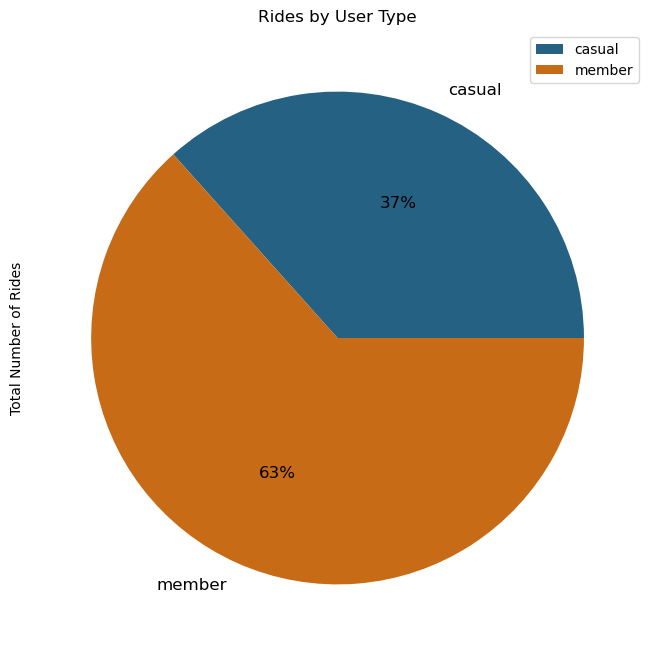

In [35]:
###Visualizing Rides by User Type
df['ride_id'].plot.pie(x='member_casual',ylabel='Total Number of Rides', title ='Rides by User Type', legend=True,autopct='%1.0f%%', fontsize='12',startangle=0,colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

In [36]:
## This pie chart shows us that annual members represent the majority of cyclistic's bike sharing system users, making 63% of total users.

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\3068790380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')
C:\Users\dell\AppData\Local\Temp\ipykernel_9888\3068790380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10')


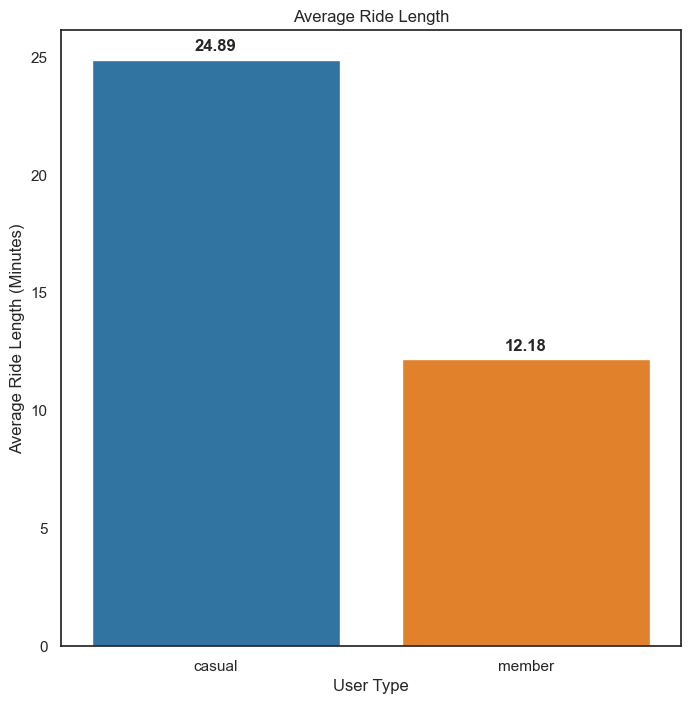

In [37]:
### Visualizing Average Ride Length
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,8))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')
ax = sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10')
ax.set_title('Average Ride Length')  # Apply set_title to the ax object


for i, row in df1.iterrows():
    ax.annotate(f'{row["ride_length"]:.2f}',  # Format to 2 decimal places
                (i, row["ride_length"]),       # Position (x, y)
                ha='center',                   # Horizontal alignment
                va='bottom',                   # Vertical alignment
                fontweight='bold',             # Make text bold
                xytext=(0, 4),                 # Offset text 5 points above the bar
                textcoords='offset points')    # Use offset for positioning

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

In [38]:
###The casual riders have the much greater ride length than members. The average ride length is 24.89 almost double the members average ride length 

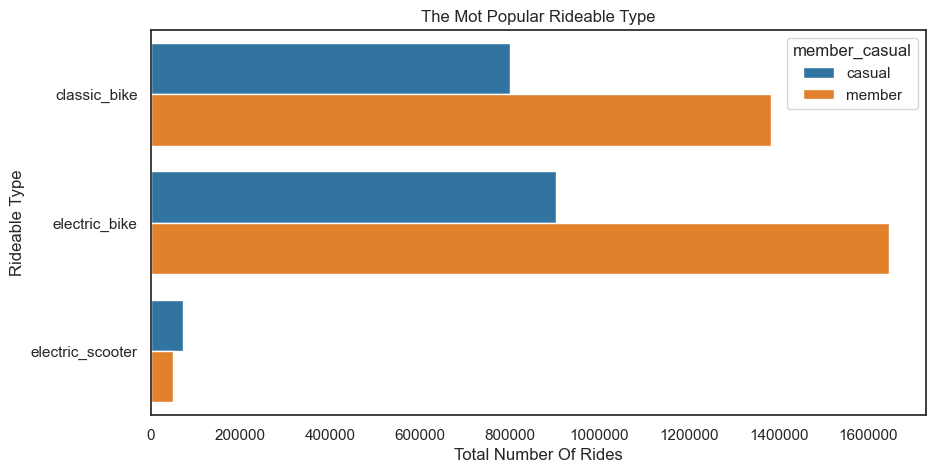

In [44]:
### visualizing the most popular rideable type
df2 = tripdata[['rideable_type','member_casual','ride_id']]
df2 = df2.groupby(['rideable_type','member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize =(10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain',axis='x')  
sns.barplot(x='ride_id',y='rideable_type',hue='member_casual',palette='tab10',data=df2).set_title('The Mot Popular Rideable Type')

plt.xlabel('Total Number Of Rides')
plt.ylabel('Rideable Type') 

plt.show()

In [ ]:
### Electric bikes are most rented rideable type by both casual riders and members

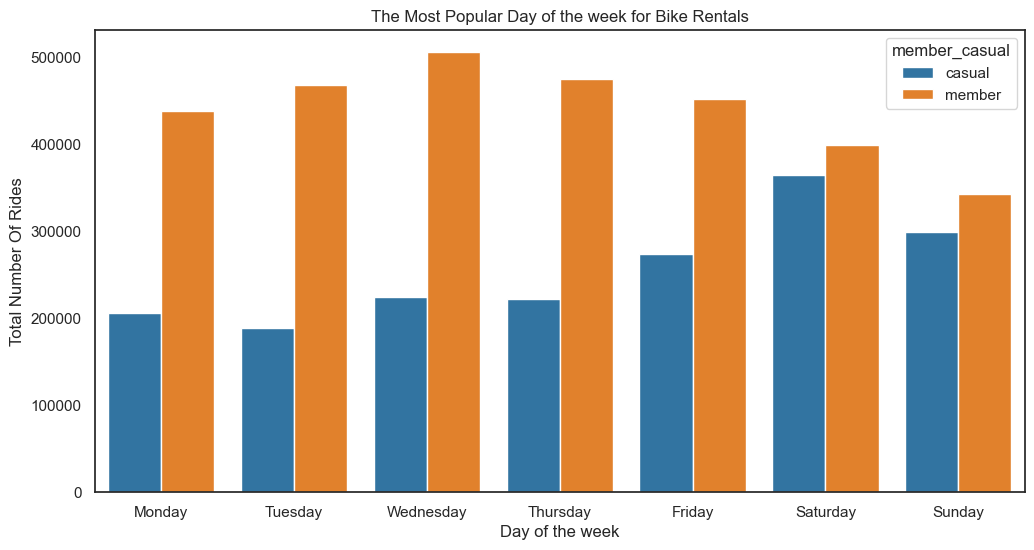

In [46]:
### Visualizing the most popular Day of the week for boke rentals 

df3 = tripdata[['dayofweek','member_casual','ride_id']]
df3 = df3.groupby(['dayofweek','member_casual'],as_index=False)[['ride_id']].count()

plt.figure(figsize=(12,6))
sns.set_theme(style='white')
sns.barplot(data=df3,x='dayofweek',y='ride_id',hue='member_casual',palette='tab10',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set_title('The Most Popular Day of the week for Bike Rentals')

plt.xlabel('Day of the week')
plt.ylabel('Total Number Of Rides')
plt.show()

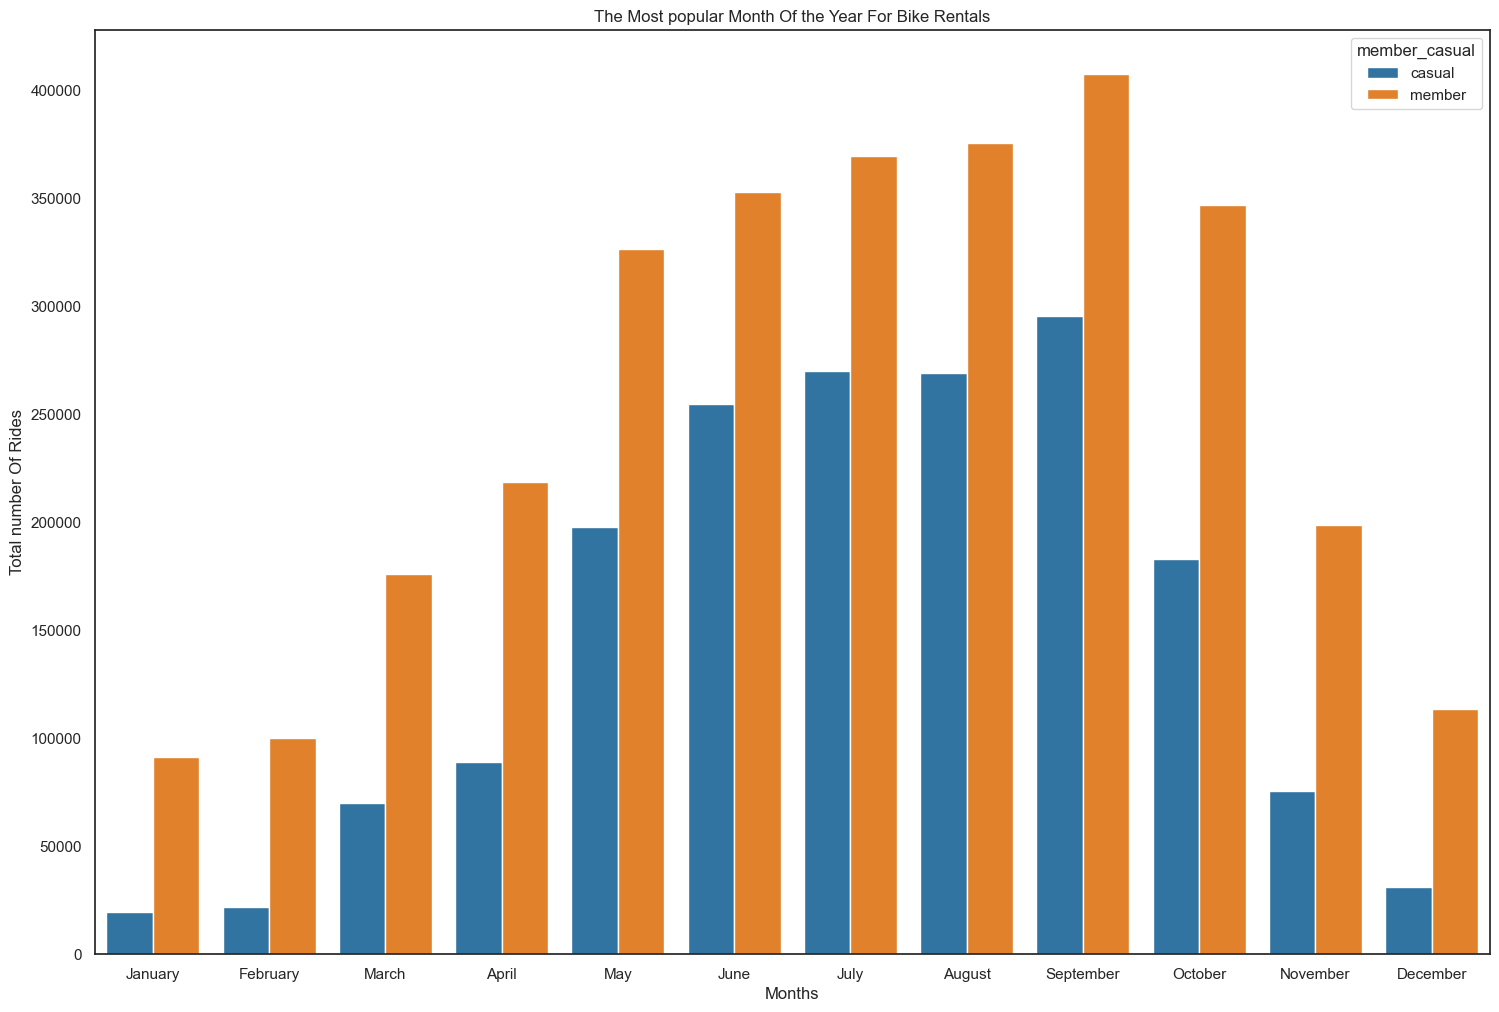

In [50]:
### The member rides are more used on weekdays where as the casuals are considerably more on weekends.

### Visualizing the most popular month of the year for Bike Rentals

df4 = tripdata[['month','member_casual','ride_id']]
df4 = df4.groupby(['month','member_casual'],as_index=False)[['ride_id']].count()

plt.figure(figsize = (18,12))
sns.set_theme(style='white')
sns.barplot(data=df4,x='month',y='ride_id',hue='member_casual',palette='tab10',
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most popular Month Of the Year For Bike Rentals'),
plt.xlabel('Months')
plt.ylabel('Total number Of Rides')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\336514174.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()


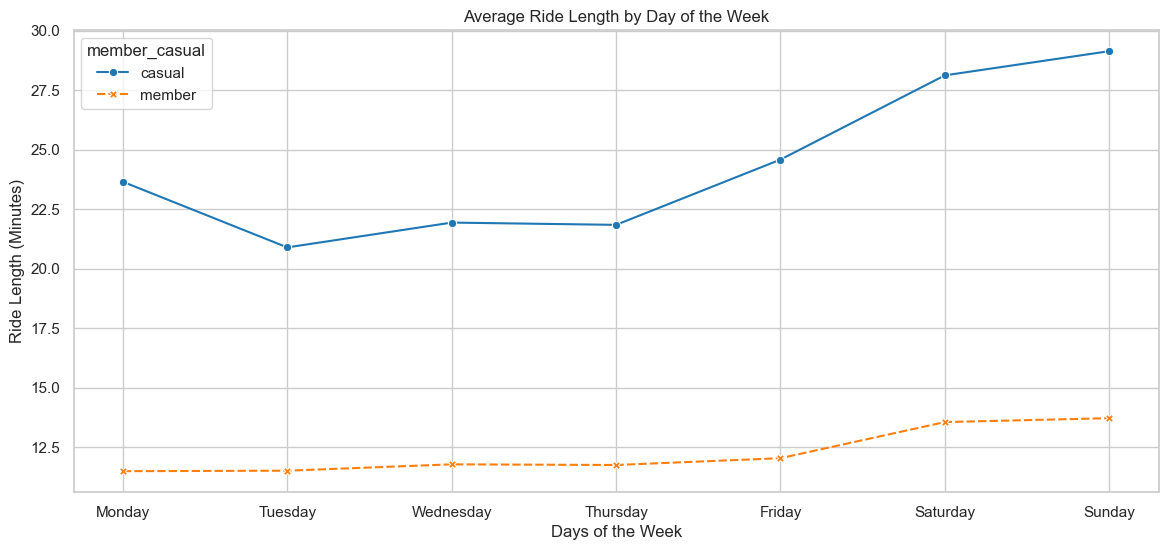

In [51]:
###Visualizing Average Ride Length by Day of the Week

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9888\3615438087.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()


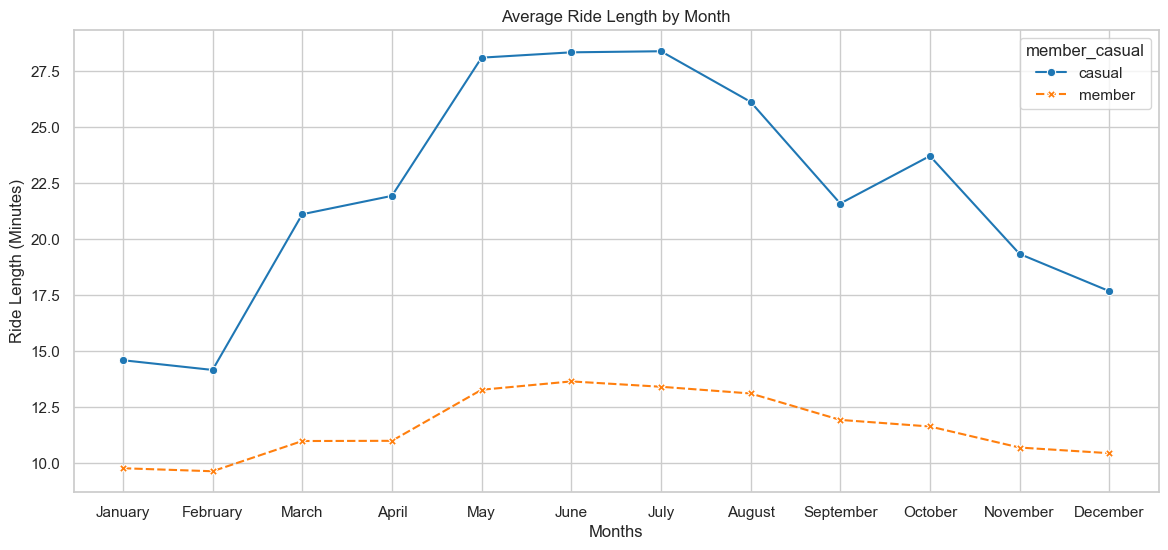

In [52]:
### Casual riders tend to take longer rides, averaging 28-29 minutes. In contrast, members peresent much shorter rides that last around 13 to 14 minutes on average.

###Visualizing Average Ride Length by Month
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()


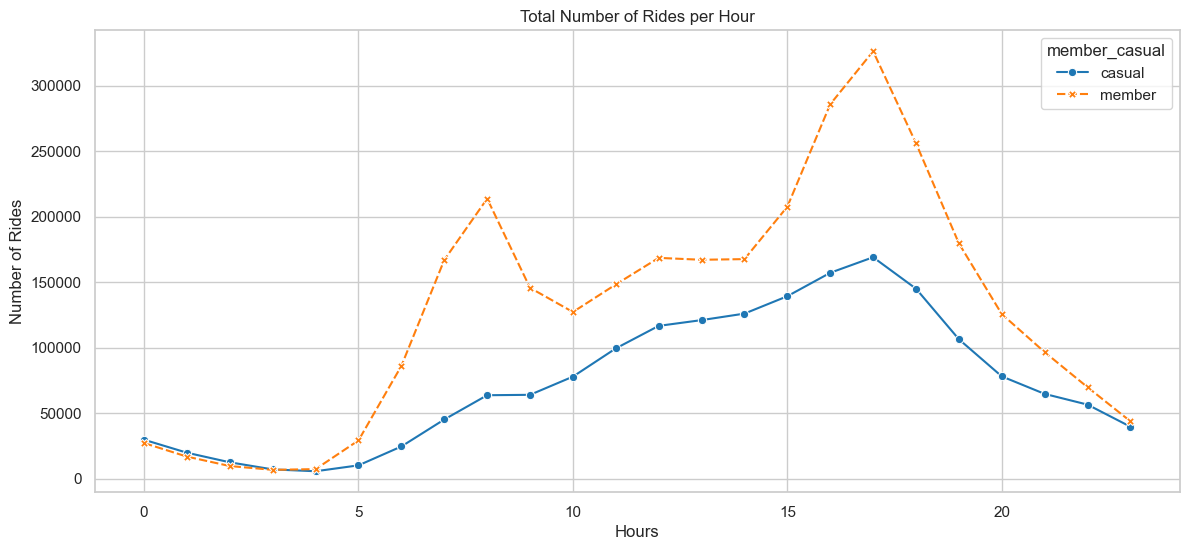

In [53]:
###When we visualize ride length by month, we can learn more about the user's riding habits throughout the year. Note that the ride length changes considerably for casual riders as the months go by. For this type of customer, the ride length peaks during the summer – reaching an average of 28 minutes in July – before dropping in August. As for the members, the ride length does not change drastically over the months, peaking in May – averaging 13 minutes – and then gradually dropping for the remainder of the year.

###Considering the short trips, this could indicate that members use Cyclistic's bikes to commute and, perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism – as mentioned earlier – especially during the spring and summer.

##Visualizing the Total Number of Rides per Hour

df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

In [ ]:
## By taking a closer look into the total nmber of rides per hour, we can find more patterns in the customer's bike rental habits.
## The number of bike rentals by casual riders begins to increase by 6 AM and 10 AM, peaking 5 PM.
## As for members the number starts to go up earlier - between 4 AM to 9 AM also peaking 5 PM.
##Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.